# MATH 693A Advanced Numerical Methods: Computational Optimization Homework 1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

### Program the steepest descent and Newton algorithms using the backtracking line search. Use them to minimize the Rosenbrock function $f(x,y)=100(y-x^2)^2 + (1-x)^2$. 
### Initial step length $\alpha_{0} = 1$, $\overline{\alpha} = 1$, $\rho = \frac{1}{2}$, $c = 10^{-4}$. Use initial point $\overline{x}_{0}^{T} = [1.2, 1.2]$ and then the more difficult point $\overline{x}_{0}^{T} = [-1.2, 1]$. 

### The gradient and hessian of the Rosenbrock function is: 
### $\nabla f = \left[\begin{array}{c} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{array}\right] = \left[\begin{array}{c} 40x^3 - 40xy +2x - 2 \\ 20(y-x^2) \end{array}\right]$,  &ensp; $\nabla^{2} f = \left[\begin{array}{c} \frac{\partial f_{x}}{\partial x} \frac{\partial f_{x}}{\partial y} \\ \frac{\partial f_{y}}{\partial x} \frac{\partial f_{y}}{\partial y} \end{array}\right] = \left[\begin{array}{c} 120x^2 - 40y + 2 \ -40x  \\ -40x \ 20 \end{array}\right]$

### The only minimum is at $(x,y)=(1,1)$ where $f(1,1)=0$.

## a) Stop when: $|f(\vec{x}_{k})| > 10^{-8}$. Print first 6 and last 6 values for  for steepest descent and Newton algorithms. Then determine the minimizer of the Rosenbrock function x*.

In [2]:
a = np.array([4, 8])
l1 = np.linalg.norm(a)

print(4*np.sqrt(5))
print(l1)

8.94427190999916
8.94427190999916


In [40]:
def ex_obj_func(xbar_k):
    x1 = xbar_k[0]
    x2 = xbar_k[1]

    return (x1 + x2**2)**2

def ex_gradient(xbar_k):
    x1 = xbar_k[0]
    x2 = xbar_k[1]
    
    return np.array([2*(x1 + x2**2), 4*x2*(x1 + x2**2)])

def ex_hessian(xbar_k):
    x1 = xbar_k[0]
    x2 = xbar_k[1]
    
    return np.array([[2, 4*x2],[4*x2, 4*x1 + 12*x2**2]])

In [4]:
# need to add space in matrices above
# functions in problem 1
def obj_func(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return 100*(y - x**2)**2 + (1 - x)**2

def gradient(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return np.array([400*x**3 - 400*x*y + 2*x - 2, 200*(y - x**2)])

def hessian(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]
    
    return np.array([[1200*x**2 - 400*y + 2, -400*x],[-400*x, 200]])

### Steepest Descent

In [49]:
# steepest descent algorithm (gradient descent using backtracking line search)
# the backtracking algorithm only makes use of the first Wolfe condition, the Armijo condition
# we do not have to make use of the second Wolfe condition, only condition we have to satisfy is the Armijo condition
# linear convergence

def steepest_descent(x0, objective_func, grad, val, abs_stop=True):
    # set alpha_0 = 1, rho = 1/2, c = 10^-4
    rho = 1/2
    c = 10**-4
    i = 1
    xbar_trans = x0 # use the initial step x0
    i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list  = [], [], [], [], []
    if abs_stop:
        while np.abs(objective_func(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            pbar_k = - (grad(xbar_trans)) / (np.linalg.norm(grad(xbar_trans)))
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    else:
        while np.linalg.norm(grad(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            pbar_k = - (grad(xbar_trans)) / (np.linalg.norm(grad(xbar_trans)))
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    steepest_descent_df = pd.DataFrame(
        [[i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list]], 
        columns=['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']
    ).explode(['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']).reset_index(drop=True)

    return steepest_descent_df


In [50]:
# test example in textbook f(x) = (x1 + x2^2)^2, starting x0= [1,1]
tb_ex_sd_df = steepest_descent([1, 1], ex_obj_func, ex_gradient, 10**-5)
tb_ex_sd_df.head(6)

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1, 1]",4,"[-0.4472135954999579, -0.8944271909999159]",1
1,2,"[0.5527864045000421, 0.10557280900008414]",0.318019,"[-0.9784274601435972, -0.20659067074035484]",1
2,3,"[-0.42564105564355503, -0.10101786174027069]",0.172587,"[0.9801950666651924, -0.19803441944575964]",0.5
3,4,"[0.06445647768904117, -0.20003507146315053]",0.010914,"[-0.9284542324648728, 0.3714468174827508]",0.125
4,5,"[-0.05160030136906793, -0.15360421927780668]",0.000784,"[0.9559089251143147, -0.2936632882857434]",0.03125
5,6,"[-0.021728147459245596, -0.16278119703673616]",0.000023,"[-0.950876750103516, 0.3095697112325035]",0.007812


In [7]:
# answer to problem 1a for x0 = [1.2, 1.2] using steepest descent
sd_1a_df = steepest_descent([1.2, 1.2], obj_func, gradient, 10**-8)
sd_1a_df.head(6) # first 6 rows for x0 = [1.2, 1.2]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.9235489582482737, 0.38348053629686124]",0.125
1,2,"[1.0845563802189657, 1.2479350670371077]",0.520845,"[0.907267511011767, -0.420553995894122]",0.03125
2,3,"[1.1129084899380834, 1.2347927546654163]",0.014172,"[-0.9297462793930084, 0.36820083643965007]",0.001953
3,4,"[1.111092579236144, 1.2355118969240875]",0.012439,"[0.7382728174997665, -0.6745022215982363]",0.000488
4,5,"[1.1114530640103137, 1.2351825501361977]",0.012424,"[-0.9949271361792931, 0.10059817937751493]",0.000488
5,6,"[1.1109672597446012, 1.2352316703409718]",0.01241,"[0.737967725727731, -0.6748360065854818]",0.000488


In [8]:
# last 6 rows for x0 = [1.2, 1.2]
sd_1a_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
7606,7607,"[1.0000947573550003, 1.0001728154927139]",0.0,"[-0.8993477754267518, 0.437234009238706]",0.000015
7607,7608,"[1.0000810343970012, 1.0001794871542318]",0.0,"[0.8901608661306647, -0.4556463896592453]",0.000015
7608,7609,"[1.0000946171738891, 1.0001725345420849]",0.0,"[-0.8993405794864492, 0.43724881027737256]",0.000015
7609,7610,"[1.0000808943256914, 1.0001792064294488]",0.0,"[0.8901683081322761, -0.45563185050753546]",0.000015
7610,7611,"[1.0000944772161353, 1.0001722540391518]",0.0,"[-0.8993333947685338, 0.4372635876151871]",0.000008
7611,7612,"[1.0000876158468515, 1.0001755900955758]",0.0,"[-0.44575036397371787, -0.8951573118828322]",0.000244


In [9]:
# answer to problem 1a for x0 = [-1.2, 1] using steepest descent
sd_2a_df = steepest_descent([-1.2, 1], obj_func, gradient, 10**-8)
sd_2a_df.head(6) # first 6 rows for x0 = [-1.2, 1]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[-1.2, 1]",24.2,"[0.9258476436951987, 0.3778969974266117]",0.25
1,2,"[-0.9685380890762003, 1.0944742493566528]",6.321495,"[-0.8754329511019114, -0.4833395784797667]",0.125
2,3,"[-1.0779672079639393, 1.034056802046682]",5.955234,"[0.9182204697883882, 0.39606965152810103]",0.0625
3,4,"[-1.020578428602165, 1.0588111552671884]",4.112427,"[-0.6557221923755633, -0.7550022559080106]",0.007812
4,5,"[-1.025701258230099, 1.052912700142907]",4.103538,"[0.9989486700781964, -0.04584271533191257]",0.007812
5,6,"[-1.0178969717451132, 1.0525545539293766]",4.098937,"[-0.6286634183205704, -0.7776775080105477]",0.007812


In [10]:
# last 6 rows for x0 = [-1.2, 1]
sd_2a_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
8294,8295,"[0.9999188045929815, 0.9998202058939761]",0.0,"[-0.8901209311303562, 0.45572439913134755]",0.000015
8295,8296,"[0.9999052224254533, 0.9998271596964531]",0.0,"[0.8993177573737281, -0.4372957480610672]",0.000015
8296,8297,"[0.9999189449254132, 0.9998204870928755]",0.0,"[-0.8901284454233253, 0.4557097219154471]",0.000015
8297,8298,"[0.9999053626432259, 0.999827440671396]",0.0,"[0.8993106012307029, -0.43731046467477963]",0.000015
8298,8299,"[0.9999190850339917, 0.9998207678432607]",0.0,"[-0.8901359474803122, 0.455695068004172]",0.000008
8299,8300,"[0.9999122938356619, 0.9998242445207204]",0.0,"[0.4472457141507889, 0.8944111309536296]",0.000244


### Newton Method

In [65]:
# newton method algorithm (newton method using backtracking line search)
# the backtracking algorithm only makes use of the first Wolfe condition, the Armijo condition
# we do not have to make use of the second Wolfe condition, only condition we have to satisfy is the Armijo condition

def newton_method(x0, objective_func, grad, hess, val, abs_stop=True):
    # set alpha_0 = 1, rho = 1/2, c = 10^-4
    rho = 1/2
    c = 10**-4
    i = 1
    xbar_trans = x0 # use the initial step x0
    i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list  = [], [], [], [], []
    if abs_stop:
        while np.abs(objective_func(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            try: 
                pbar_k = np.dot(- np.linalg.inv(hess(xbar_trans)), grad(xbar_trans))
            except: 
                break
                
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    else:
        while np.linalg.norm(grad(xbar_trans)) > val: 
            if i > 1:
                xbar_trans = xbar_trans + alpha * pbar_k

            # find descent direction pbar_k
            try: 
                pbar_k = np.dot(- np.linalg.inv(hess(xbar_trans)), grad(xbar_trans))
            except: 
                break
                
            alpha = 1
            while(objective_func(xbar_trans + alpha * pbar_k) > objective_func(xbar_trans) + c * alpha * np.dot(pbar_k, grad(xbar_trans))):
                alpha = rho * alpha 

            i_list.append(i)
            xbar_trans_list.append(xbar_trans)
            obj_func_xbar_list.append(objective_func(xbar_trans))
            pbar_list.append(pbar_k)
            alpha_list.append(alpha)
            i += 1

    newton_method_df = pd.DataFrame(
        [[i_list, xbar_trans_list, obj_func_xbar_list, pbar_list, alpha_list]], 
        columns=['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']
    ).explode(['iteration', 'xbar', 'f(xbar)', 'pbar', 'alpha']).reset_index(drop=True)

    return newton_method_df


In [66]:
# test example in textbook f(x) = (x1 + x2^2)^2, starting x0= [1,1]
tb_ex_nm_df = newton_method([1, 1], ex_obj_func, ex_gradient, ex_hessian, 10**-5)
tb_ex_nm_df

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1, 1]",4,"[-2.0, 0.0]",1


In [67]:
# answer to problem 1a for x0 = [1.2, 1.2] using newton method
nm_1a_df = newton_method([1.2, 1.2], obj_func, gradient, hessian, 10**-8)
nm_1a_df.head(6) # first 6 rows for x0 = [1.2, 1.2]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.004081632653060607, 0.23020408163265405]",1
1,2,"[1.1959183673469393, 1.430204081632654]",0.038384,"[-0.19526774595262214, -0.4670319081452387]",0.5
2,3,"[1.0982844943706283, 1.1966881275600347]",0.018762,"[-0.03379633511182467, -0.0646952786248296]",1
3,4,"[1.0644881592588036, 1.1319928489352051]",0.004289,"[-0.05249604412861478, -0.11062064249868542]",1
4,5,"[1.0119921151301887, 1.0213722064365198]",0.000903,"[-0.007731028105065874, -0.012891644319199758]",1
5,6,"[1.0042610870251227, 1.00848056211732]",0.000019,"[-0.004210752701670295, -0.008397621375185741]",1


In [68]:
# last 6 rows for x0 = [1.2, 1.2]
nm_1a_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
2,3,"[1.0982844943706283, 1.1966881275600347]",0.018762,"[-0.03379633511182467, -0.0646952786248296]",1
3,4,"[1.0644881592588036, 1.1319928489352051]",0.004289,"[-0.05249604412861478, -0.11062064249868542]",1
4,5,"[1.0119921151301887, 1.0213722064365198]",0.000903,"[-0.007731028105065874, -0.012891644319199758]",1
5,6,"[1.0042610870251227, 1.00848056211732]",0.000019,"[-0.004210752701670295, -0.008397621375185741]",1
6,7,"[1.0000503343234524, 1.0000829407421343]",0.0,"[-5.015646421904253e-05, -8.258753930703855e-05]",1
7,8,"[1.0000001778592333, 1.0000003532028272]",0.0,"[-1.778591414086477e-07, -3.53202675080233e-07]",1


In [69]:
# answer to problem 1a for x0 = [-1.2, 1] using newton method
nm_2a_df = newton_method([-1.2, 1], obj_func, gradient, hessian, 10**-8)
nm_2a_df.head(6) # first 6 rows for x0 = [-1.2, 1]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[-1.2, 1]",24.2,"[0.02471910112359521, 0.3806741573033712]",1
1,2,"[-1.1752808988764047, 1.3806741573033712]",4.731884,"[1.938395770053016, -4.555708012051901]",0.125
2,3,"[-0.9329814276197778, 0.8112106557968836]",4.087399,"[0.1504413486489269, -0.22147427998448577]",1
3,4,"[-0.7825400789708509, 0.5897363758123978]",3.228673,"[0.32254295990113013, -0.48217298724173707]",1
4,5,"[-0.45999711906972074, 0.10756338857066072]",3.213898,"[0.06695148492833658, 0.042438980612832855]",1
5,6,"[-0.39304563414138416, 0.15000236918349358]",1.942585,"[0.734534900158935, -0.5729289699297846]",0.25


In [70]:
# last 6 rows for x0 = [-1.2, 1]
nm_2a_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
15,16,"[0.8634908081055275, 0.7419312454327026]",0.019993,"[0.07858787834179581, 0.13940495140334652]",1
16,17,"[0.9420786864473233, 0.8813361968360491]",0.007169,"[0.02591313102447529, 0.05500047149681486]",1
17,18,"[0.9679918174717985, 0.936336668332864]",0.00107,"[0.028218493287787985, 0.05530203156741492]",1
18,19,"[0.9962103107595865, 0.9916386999002789]",0.000078,"[0.0032690683001680987, 0.007309642457842824]",1
19,20,"[0.9994793790597547, 0.9989483423581217]",0.0,"[0.0005195105583594508, 0.0010491669881192989]",1
20,21,"[0.9999988896181141, 0.999997509346241]",0.0,"[1.1103219479153634e-06, 2.490532650218391e-06]",1


## The minimizer of the Rosenbrock function is x* = [1,1]

## b) Repeat (a.) above but stop when $||f(\vec{x}_{k})|| > 10^{-8}$. Compare your results with those from (a.) and discuss your observation with regards to number of iterations required in order to achieve convergence.

### Steepest Descent

In [11]:
# answer to problem 1a for x0 = [1.2, 1.2] using steepest descent
sd_1b_df = steepest_descent([1.2, 1.2], obj_func, gradient, 10**-8, abs_stop=False)
sd_1b_df.head(6) # first 6 rows for x0 = [1.2, 1.2]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.9235489582482737, 0.38348053629686124]",0.125
1,2,"[1.0845563802189657, 1.2479350670371077]",0.520845,"[0.907267511011767, -0.420553995894122]",0.03125
2,3,"[1.1129084899380834, 1.2347927546654163]",0.014172,"[-0.9297462793930084, 0.36820083643965007]",0.001953
3,4,"[1.111092579236144, 1.2355118969240875]",0.012439,"[0.7382728174997665, -0.6745022215982363]",0.000488
4,5,"[1.1114530640103137, 1.2351825501361977]",0.012424,"[-0.9949271361792931, 0.10059817937751493]",0.000488
5,6,"[1.1109672597446012, 1.2352316703409718]",0.01241,"[0.737967725727731, -0.6748360065854818]",0.000488


In [12]:
# last 6 rows for x0 = [1.2, 1.2]
sd_1b_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
18050,18051,"[1.0000000015162418, 1.000000002777841]",0.0,"[-0.8995681671996278, 0.4367803939751673]",0.0
18051,18052,"[1.0000000013067947, 1.0000000028795368]",0.0,"[0.8898993822446628, -0.4561568693778133]",0.0
18052,18053,"[1.0000000015139905, 1.0000000027733296]",0.0,"[-0.8995606734550243, 0.4367958273302792]",0.0
18053,18054,"[1.0000000013045451, 1.000000002875029]",0.0,"[0.8899072524871989, -0.45614151528959157]",0.0
18054,18055,"[1.0000000015117427, 1.0000000027688254]",0.0,"[-0.8995530616655313, 0.43681150310879974]",0.0
18055,18056,"[1.000000001407021, 1.000000002819677]",0.0,"[-0.4449670025151173, -0.8955469650848645]",0.0


In [13]:
# answer to problem 1a for x0 = [-1.2, 1] using steepest descent
sd_2b_df = steepest_descent([-1.2, 1], obj_func, gradient, 10**-8, abs_stop=False)
sd_2b_df.head(6) # first 6 rows for x0 = [-1.2, 1]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[-1.2, 1]",24.2,"[0.9258476436951987, 0.3778969974266117]",0.25
1,2,"[-0.9685380890762003, 1.0944742493566528]",6.321495,"[-0.8754329511019114, -0.4833395784797667]",0.125
2,3,"[-1.0779672079639393, 1.034056802046682]",5.955234,"[0.9182204697883882, 0.39606965152810103]",0.0625
3,4,"[-1.020578428602165, 1.0588111552671884]",4.112427,"[-0.6557221923755633, -0.7550022559080106]",0.007812
4,5,"[-1.025701258230099, 1.052912700142907]",4.103538,"[0.9989486700781964, -0.04584271533191257]",0.007812
5,6,"[-1.0178969717451132, 1.0525545539293766]",4.098937,"[-0.6286634183205704, -0.7776775080105477]",0.007812


In [14]:
# last 6 rows for x0 = [-1.2, 1]
sd_2b_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
17883,17884,"[0.9999999971661928, 0.9999999948424777]",0.0,"[0.8992350312455459, -0.4374658370442452]",0.0
17884,17885,"[0.9999999975849317, 0.9999999946387668]",0.0,"[-0.8902464009200372, 0.4554792483186479]",0.0
17885,17886,"[0.9999999971703785, 0.9999999948508658]",0.0,"[0.8992280098816675, -0.4374802695485313]",0.0
17886,17887,"[0.9999999975891142, 0.9999999946471482]",0.0,"[-0.8902537290167827, 0.4554649250729555]",0.0
17887,17888,"[0.9999999971745575, 0.9999999948592405]",0.0,"[0.8992209992189818, -0.4374946794689234]",0.0
17888,17889,"[0.9999999973839236, 0.9999999947573783]",0.0,"[0.4464130294608878, 0.8948270263730037]",0.0


### Newton Method

In [71]:
# answer to problem 1a for x0 = [1.2, 1.2] using newton method
nm_1b_df = newton_method([1.2, 1.2], obj_func, gradient, hessian, 10**-8, abs_stop=False)
nm_1b_df.head(6) # first 6 rows for x0 = [1.2, 1.2]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[1.2, 1.2]",5.8,"[-0.004081632653060607, 0.23020408163265405]",1
1,2,"[1.1959183673469393, 1.430204081632654]",0.038384,"[-0.19526774595262214, -0.4670319081452387]",0.5
2,3,"[1.0982844943706283, 1.1966881275600347]",0.018762,"[-0.03379633511182467, -0.0646952786248296]",1
3,4,"[1.0644881592588036, 1.1319928489352051]",0.004289,"[-0.05249604412861478, -0.11062064249868542]",1
4,5,"[1.0119921151301887, 1.0213722064365198]",0.000903,"[-0.007731028105065874, -0.012891644319199758]",1
5,6,"[1.0042610870251227, 1.00848056211732]",0.000019,"[-0.004210752701670295, -0.008397621375185741]",1


In [72]:
# last 6 rows for x0 = [1.2, 1.2]
nm_1b_df.tail(6)

,iteration,xbar,f(xbar),pbar,alpha
3,4,"[1.0644881592588036, 1.1319928489352051]",0.004289,"[-0.05249604412861478, -0.11062064249868542]",1
4,5,"[1.0119921151301887, 1.0213722064365198]",0.000903,"[-0.007731028105065874, -0.012891644319199758]",1
5,6,"[1.0042610870251227, 1.00848056211732]",0.000019,"[-0.004210752701670295, -0.008397621375185741]",1
6,7,"[1.0000503343234524, 1.0000829407421343]",0.0,"[-5.015646421904253e-05, -8.258753930703855e-05]",1
7,8,"[1.0000001778592333, 1.0000003532028272]",0.0,"[-1.778591414086477e-07, -3.53202675080233e-07]",1
8,9,"[1.000000000000092, 1.000000000000152]",0.0,"[-1.0791367799229698e-13, -1.8407497748033549e...",1


In [73]:
# answer to problem 1a for x0 = [-1.2, 1] using newton method
nm_2b_df = newton_method([-1.2, 1], obj_func, gradient, hessian, 10**-8, abs_stop=False)
nm_2b_df.head(6) # first 6 rows for x0 = [-1.2, 1]

,iteration,xbar,f(xbar),pbar,alpha
0,1,"[-1.2, 1]",24.2,"[0.02471910112359521, 0.3806741573033712]",1
1,2,"[-1.1752808988764047, 1.3806741573033712]",4.731884,"[1.938395770053016, -4.555708012051901]",0.125
2,3,"[-0.9329814276197778, 0.8112106557968836]",4.087399,"[0.1504413486489269, -0.22147427998448577]",1
3,4,"[-0.7825400789708509, 0.5897363758123978]",3.228673,"[0.32254295990113013, -0.48217298724173707]",1
4,5,"[-0.45999711906972074, 0.10756338857066072]",3.213898,"[0.06695148492833658, 0.042438980612832855]",1
5,6,"[-0.39304563414138416, 0.15000236918349358]",1.942585,"[0.734534900158935, -0.5729289699297846]",0.25


In [74]:
# last 6 rows for x0 = [-1.2, 1]
nm_2b_df.tail(6) 

,iteration,xbar,f(xbar),pbar,alpha
16,17,"[0.9420786864473233, 0.8813361968360491]",0.007169,"[0.02591313102447529, 0.05500047149681486]",1
17,18,"[0.9679918174717985, 0.936336668332864]",0.00107,"[0.028218493287787985, 0.05530203156741492]",1
18,19,"[0.9962103107595865, 0.9916386999002789]",0.000078,"[0.0032690683001680987, 0.007309642457842824]",1
19,20,"[0.9994793790597547, 0.9989483423581217]",0.0,"[0.0005195105583594508, 0.0010491669881192989]",1
20,21,"[0.9999988896181141, 0.999997509346241]",0.0,"[1.1103219479153634e-06, 2.490532650218391e-06]",1
21,22,"[0.9999999999400621, 0.9999999998788912]",0.0,"[5.993161519654776e-11, 1.2109613305475733e-10]",1


## Newton method is a lot faster than steepest descent for part b

# Problem 2

### Using the $\vec{x}_{k}$ values you obtained in Problem 1: 

## i) Plot the value of objective function $f(\vec{x}_{k})$ against the iteration number for the steepest descent algorithm.

In [30]:
def contourplot(objective_func, x_range, y_range, ncontours=50):
    xmin = x_range[0]
    xmax = x_range[1]
    ymin = y_range[0]
    ymax = y_range[1]

    # range of x and y 
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(x,y)
    xbar = [X,Y]
    Z = objective_func(xbar)

    plt.figure(figsize=(7,7))
    plt.contour(X,Y,Z,ncontours); # plot the contours
    plt.scatter(1,1,marker="x",s=50,color="r");  # mark the minimum

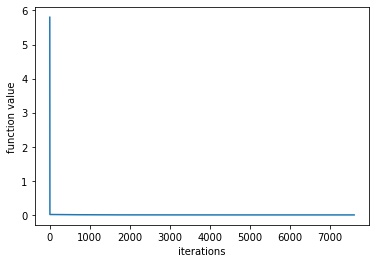

In [34]:
# x0 = [1.2, 1.2] for sd_1a_df 

'''
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(obj_func, [-2, 2], [-5,6])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=100(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");
'''

#plt.subplot(1,2,2)
plt.plot(sd_1a_df['iteration'], sd_1a_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

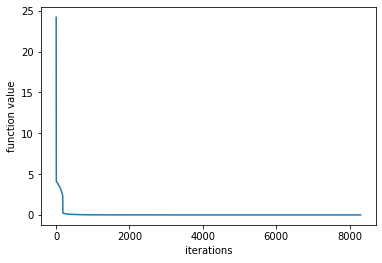

In [35]:
# x0 = [-1.2, 1] for sd_2a_df 
plt.plot(sd_2a_df['iteration'], sd_2a_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

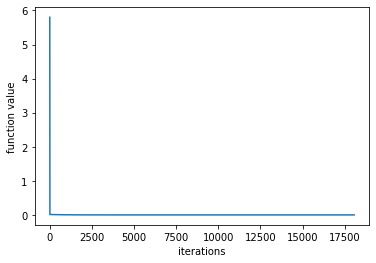

In [36]:
# x0 = [1.2, 1.2] for sd_1b_df 
plt.plot(sd_1b_df['iteration'], sd_1b_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

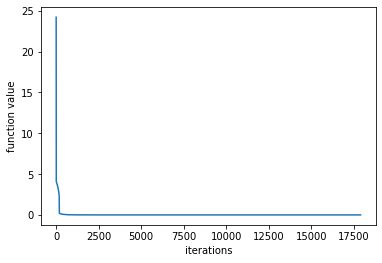

In [37]:
# x0 = [-1.2, 1] for sd_2b_df 
plt.plot(sd_2b_df['iteration'], sd_2b_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

## ii) Plot the value of objective function $f(\vec{x}_{k})$ against the iteration number for the Newton algorithms.

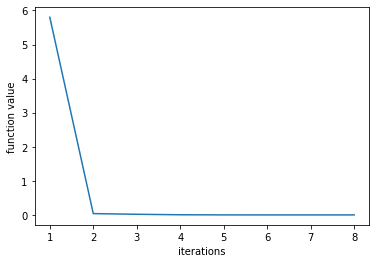

In [75]:
# x0 = [1.2, 1.2] for nm_1a_df 
plt.plot(nm_1a_df['iteration'], nm_1a_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

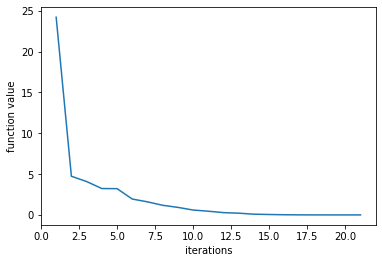

In [76]:
# x0 = [-1.2, 1] for nm_2a_df 
plt.plot(nm_2a_df['iteration'], nm_2a_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

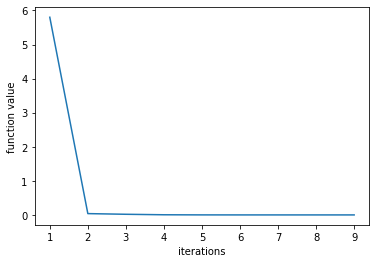

In [77]:
# x0 = [1.2, 1.2] for nm_1b_df 
plt.plot(nm_1b_df['iteration'], nm_1b_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

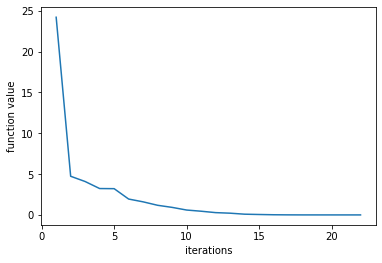

In [78]:
# x0 = [-1.2, 1] for nm_2b_df 
plt.plot(nm_2b_df['iteration'], nm_2b_df['f(xbar)'])
plt.xlabel("iterations")
plt.ylabel("function value");

## (iii) Compare the graph obtained in (i) with the one obtained in (ii). What can you infer about the convergence of the steepest descent and Newton algorithm.

## The graphs for newton method show that convergence is similar across any starting point and a lot faster than steepest descent. 

# Problem 3

## a) Determine if the following function of two variables is convex: $f(x,y)=5-5x-2y+2x^2+5xy+6y^2$
 

### Please refer to word doc. 

## b) Create a contour plot of the function

In [ ]:
def obj_func(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return 5 - 5*x - 2*y + 2*x**2 + 5*x*y + 6*y**2

In [ ]:
contourplot(obj_func, [-15, 15], [-20, 20])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contours of $f(x,y)=5-5x-2y+2x^2+5xy+6y^2$");

# Problem 4

## i) Show that the sequence $x_{k} = 1 + (0.5)^{2^k}$ is Q-quadratically convergent to 1

### Please refer to word doc.

## ii) Does the sequence $x_{k} = 1/k!$ converge Q-superlinearly? or Q-quadratically?

### Please refer to word doc.